In [78]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [65]:
data = load_breast_cancer()

In [73]:
X = data['data']
y = data['target']

In [74]:
algorithm = label_propagation.LabelSpreading().fit(X,y)

In [79]:
Pr = PCA(n_components=2)

In [80]:
Pr.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [87]:
Xp = Pr.fit_transform(X,y).T

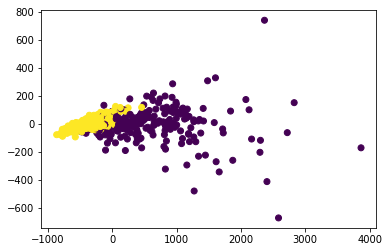

In [89]:
plt.scatter(Xp[0],Xp[1],c=y)

In [86]:
Xp[0]

array([1160.1425737 , -293.91754364])

In [17]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

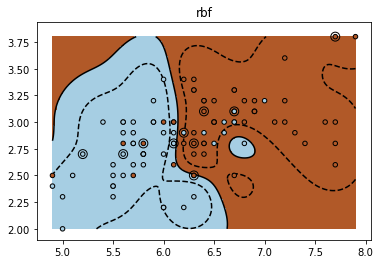

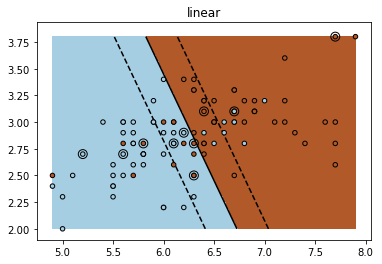

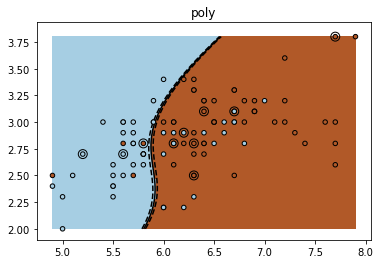

In [20]:
# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

In [22]:
X.shape

(100, 2)

In [23]:
y.shape

(100,)

In [2]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.semi_supervised import label_propagation

In [3]:
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
dataset = make_blobs(centers=[[0, 0], [0, 1]], cluster_std=[0.4,0.6],**blobs_params)

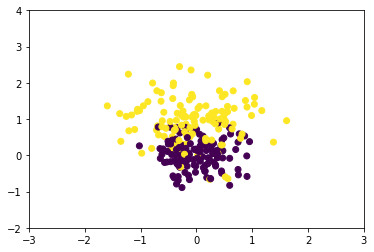

In [4]:
data = dataset[0];label = dataset[1]
x = data[:,0];y = data[:,1]
plt.scatter(x, y, c=label)
plt.xlim(-3,3)
plt.ylim(-2,4)
plt.show()


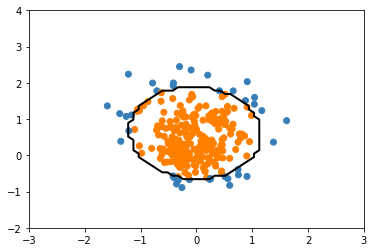

In [29]:
algorithm = OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)
label_pred = algorithm.fit(data).predict(data)
colors = np.array(['#377eb8', '#ff7f00'])
xx, yy = np.meshgrid(np.linspace(-7, 7, 150),np.linspace(-7, 7, 150))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(x,y,color=colors[np.int16((label_pred+1)//2)])
plt.xlim(-3, 3)
plt.ylim(-2, 4)
plt.show()

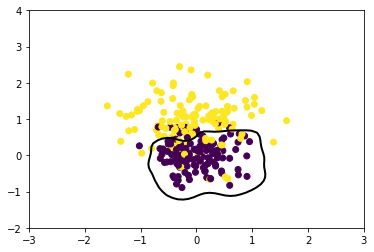

In [16]:
algorithm = svm.SVC(kernel='rbf', gamma=10)
algorithm.fit(data, label)
colors = np.array(['#377eb8', '#ff7f00'])
xx, yy = np.meshgrid(np.linspace(-7, 7, 150),np.linspace(-7, 7, 150))
Z = algorithm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(x,y,c=label)
plt.xlim(-3, 3)
plt.ylim(-2, 4)
plt.show()

In [58]:
rng = np.random.RandomState(0)
label_10 = np.copy(label)
label_10[rng.rand(len(label)) > 0.1] = -1
label_30 = np.copy(label)
label_30[rng.rand(len(label)) > 0.3] = -1
label_50 = np.copy(label)
label_50[rng.rand(len(label)) > 0.5] = -1
label_70 = np.copy(label)
label_70[rng.rand(len(label)) > 0.7] = -1

ls10 = label_propagation.LabelSpreading().fit(data, label_10)
ls30 = label_propagation.LabelSpreading().fit(data, label_30)
ls50 = label_propagation.LabelSpreading().fit(data, label_50)
ls70 = label_propagation.LabelSpreading().fit(data, label_70)
ls100 = label_propagation.LabelSpreading().fit(data, label)

/home/nel/anaconda3/lib/python3.7/site-packages/sklearn/semi_supervised/label_propagation.py:205: RuntimeWarning: divide by zero encountered in true_divide
  probabilities /= normalizer
/home/nel/anaconda3/lib/python3.7/site-packages/sklearn/semi_supervised/label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/nel/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


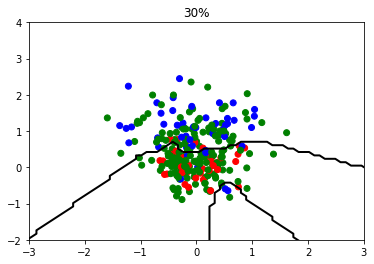

/home/nel/anaconda3/lib/python3.7/site-packages/sklearn/semi_supervised/label_propagation.py:205: RuntimeWarning: divide by zero encountered in true_divide
  probabilities /= normalizer
/home/nel/anaconda3/lib/python3.7/site-packages/sklearn/semi_supervised/label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/nel/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


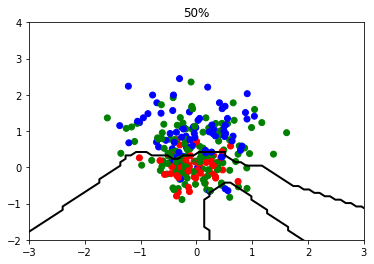

/home/nel/anaconda3/lib/python3.7/site-packages/sklearn/semi_supervised/label_propagation.py:205: RuntimeWarning: divide by zero encountered in true_divide
  probabilities /= normalizer
/home/nel/anaconda3/lib/python3.7/site-packages/sklearn/semi_supervised/label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/nel/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


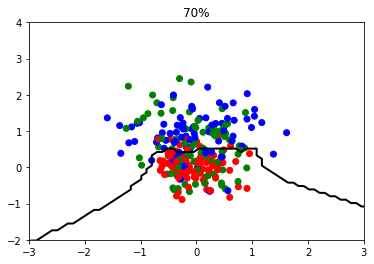

/home/nel/anaconda3/lib/python3.7/site-packages/sklearn/semi_supervised/label_propagation.py:205: RuntimeWarning: divide by zero encountered in true_divide
  probabilities /= normalizer
/home/nel/anaconda3/lib/python3.7/site-packages/sklearn/semi_supervised/label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/nel/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


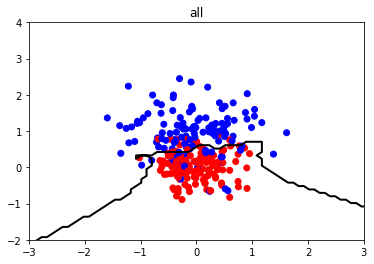

In [63]:
colors=np.array(['g','r','b'])
'''
xx, yy = np.meshgrid(np.linspace(-7, 7, 150),np.linspace(-7, 7, 150))
Z = ls10.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(x,y,c=colors[np.int16(label_10+1)])
plt.xlim(-3, 3)
plt.ylim(-2, 4)
plt.show()
'''

xx, yy = np.meshgrid(np.linspace(-7, 7, 150),np.linspace(-7, 7, 150))
Z = ls30.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(x,y,c=colors[np.int16(label_30+1)])
plt.xlim(-3, 3)
plt.ylim(-2, 4)
plt.title('30%')
plt.show()

xx, yy = np.meshgrid(np.linspace(-7, 7, 150),np.linspace(-7, 7, 150))
Z = ls50.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(x,y,c=colors[np.int16(label_50+1)])
plt.xlim(-3, 3)
plt.ylim(-2, 4)
plt.title('50%')
plt.show()

xx, yy = np.meshgrid(np.linspace(-7, 7, 150),np.linspace(-7, 7, 150))
Z = ls70.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(x,y,c=colors[np.int16(label_70+1)])
plt.xlim(-3, 3)
plt.ylim(-2, 4)
plt.title('70%')
plt.show()

xx, yy = np.meshgrid(np.linspace(-7, 7, 150),np.linspace(-7, 7, 150))
Z = ls100.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(x,y,c=colors[np.int16(label+1)])
plt.xlim(-3, 3)
plt.ylim(-2, 4)
plt.title('all')
plt.show()


In [55]:
(label_70<0).sum()

170

In [41]:
colors=np.array(['g','r','b'])

In [42]:
colors[np.int16(np.array([0,1,1]))]

array(['g', 'r', 'r'], dtype='<U1')

In [37]:
np.int16((label_pred+1)//2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int16)